In [52]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [25]:
#get data for sp500 index stored in a pandas dataframe
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [27]:
#remove dividends and stock splits since we are not using it
if "Dividends" in sp500.columns:
    del sp500["Dividends"]

if "Stock Splits" in sp500.columns:
    del sp500["Stock Splits"]

# Display the resulting DataFrame
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-12-16 00:00:00-05:00,6063.790039,6085.189941,6059.140137,6074.080078,4391100000
2024-12-17 00:00:00-05:00,6052.549805,6057.680176,6035.189941,6050.609863,4544500000
2024-12-18 00:00:00-05:00,6047.649902,6070.669922,5867.790039,5872.160156,5246960000


<Axes: xlabel='Date'>

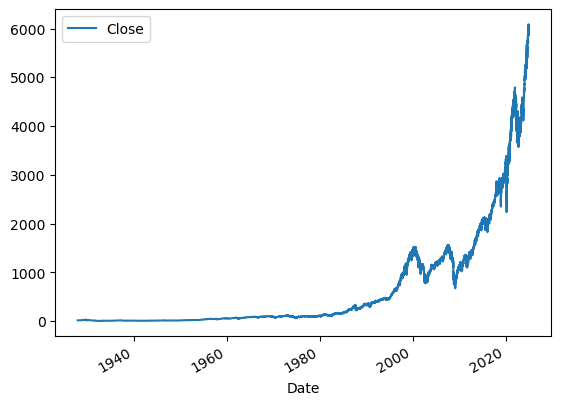

In [13]:
#generate the trend plot for the sp500 from 1927 - current
sp500.plot.line(y="Close",use_index=True)

In [37]:
#create 2 more columns with Tomorrow being expected price based on trend
#Target returns 1 "true" if tomorrow price is greater than current closing price
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-12-16 00:00:00-05:00,6063.790039,6085.189941,6059.140137,6074.080078,4391100000,6050.609863,0
2024-12-17 00:00:00-05:00,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,5872.160156,0
2024-12-18 00:00:00-05:00,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,5867.080078,0


In [39]:
#Remove old data, focusing on more recent data from 1999
sp500 = sp500.loc["1999-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1999-01-04 00:00:00-05:00,1229.229980,1248.810059,1219.099976,1228.099976,877000000,1244.780029,1
1999-01-05 00:00:00-05:00,1228.099976,1246.109985,1228.099976,1244.780029,775000000,1272.339966,1
1999-01-06 00:00:00-05:00,1244.780029,1272.500000,1244.780029,1272.339966,986900000,1269.729980,0
1999-01-07 00:00:00-05:00,1272.339966,1272.339966,1257.680054,1269.729980,863000000,1275.089966,1
1999-01-08 00:00:00-05:00,1269.729980,1278.239990,1261.819946,1275.089966,937800000,1263.880005,0
...,...,...,...,...,...,...,...
2024-12-16 00:00:00-05:00,6063.790039,6085.189941,6059.140137,6074.080078,4391100000,6050.609863,0
2024-12-17 00:00:00-05:00,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,5872.160156,0
2024-12-18 00:00:00-05:00,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,5867.080078,0


In [106]:
#Train initial model using Random Forest
#Random forest reduce the chances of overfitting
#Random forest will create a bunch of decision trees and find avg

model = RandomForestClassifier(n_estimators=500, min_samples_split=50, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])
                              

RandomForestClassifier(min_samples_split=50, n_estimators=500, random_state=1)

In [107]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"],preds)

0.64

<Axes: xlabel='Date'>

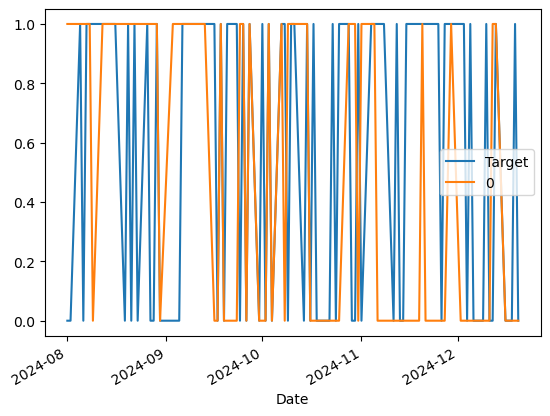

In [108]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()

In [109]:
#backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

def backtest(data, model, predictors, start = 2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [110]:
predictions = backtest(sp500, model, new_predictors)


In [111]:
predictions["Predictions"].value_counts()

Predictions
0.0    3452
1.0     583
Name: count, dtype: int64

In [112]:
precision_score(predictions["Target"], predictions["Predictions"])

0.548885077186964

In [84]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.545477
0    0.454523
Name: count, dtype: float64

In [88]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []
for horizon in horizons:
    rolling_avg = sp500.rolling(horizon).mean()
    ratio_col = f"Close_Ratio_{horizon}"
    sp500[ratio_col] = sp500["Close"] / rolling_avg["Close"]
    trend_col = f"Trend_{horizon}"
    sp500[trend_col] = sp500["Target"].shift(1).rolling(horizon).sum()
    new_predictors += [ratio_col, trend_col]


In [120]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1999-01-04 00:00:00-05:00,1229.229980,1248.810059,1219.099976,1228.099976,877000000,1244.780029,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05 00:00:00-05:00,1228.099976,1246.109985,1228.099976,1244.780029,775000000,1272.339966,1,1.006745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06 00:00:00-05:00,1244.780029,1272.500000,1244.780029,1272.339966,986900000,1269.729980,0,1.010949,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07 00:00:00-05:00,1272.339966,1272.339966,1257.680054,1269.729980,863000000,1275.089966,1,0.998973,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08 00:00:00-05:00,1269.729980,1278.239990,1261.819946,1275.089966,937800000,1263.880005,0,1.002106,1.0,1.013579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-16 00:00:00-05:00,6063.790039,6085.189941,6059.140137,6074.080078,4391100000,6050.609863,0,1.001896,1.0,1.002472,2.0,1.032601,36.0,1.127786,146.0,1.348720,532.0
2024-12-17 00:00:00-05:00,6052.549805,6057.680176,6035.189941,6050.609863,4544500000,5872.160156,0,0.998064,1.0,0.998081,2.0,1.027644,35.0,1.122359,145.0,1.342808,531.0
2024-12-18 00:00:00-05:00,6047.649902,6070.669922,5867.790039,5872.160156,5246960000,5867.080078,0,0.985033,0.0,0.975468,1.0,0.996943,34.0,1.088310,145.0,1.302587,530.0
